In [2]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 27.01 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [5]:
# Importing Vgg 19 library 
# Here i will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [6]:

# since weights are already being trained under vgg19 . so we are not going to update the weights
for layer in vgg19.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('/content/Malaria-Classification-Using-CNN/malaria-dataset')

In [8]:
len(folders)

1

In [9]:
# flattening all the outputs of the exhisting layers
flat_out = Flatten()(vgg19.output)

In [10]:
vgg19_out = Dense(2, activation='softmax')(flat_out)

# creating a model object
model = Model(inputs=vgg19.input, outputs=vgg19_out)

In [11]:
# checking the structure of the model
model.summary()

# we can find from the below summary that the last layer that we have added has two output or classess that we want 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
# Since we have defined the architecture of the model now i am going to tell the model what cost and optimization method to use.

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)



In [14]:
training_set = data_generator.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (224, 224),
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [15]:
test_set = data_generator.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   batch_size = 32,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [16]:
training_set.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [17]:
# Now we have defined our train and test set. Lastly i am training my model given below

history = model.fit_generator(
  generator = training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
689/689 [==============================] - 446s 621ms/step - loss: 0.3782 - accuracy: 0.8385 - val_loss: 0.2968 - val_accuracy: 0.8708
Epoch 2/5
689/689 [==============================] - 414s 601ms/step - loss: 0.2884 - accuracy: 0.8871 - val_loss: 0.3701 - val_accuracy: 0.8559
Epoch 3/5
689/689 [==============================] - 404s 587ms/step - loss: 0.2523 - accuracy: 0.9028 - val_loss: 0.3316 - val_accuracy: 0.8800
Epoch 4/5
689/689 [==============================] - 405s 588ms/step - loss: 0.2451 - accuracy: 0.9070 - val_loss: 0.2960 - val_accuracy: 0.8918
Epoch 5/5
689/689 [==============================] - 405s 588ms/step - loss: 0.2425 - accuracy: 0.9107 - val_loss: 0.3514 - val_accuracy: 0.8782


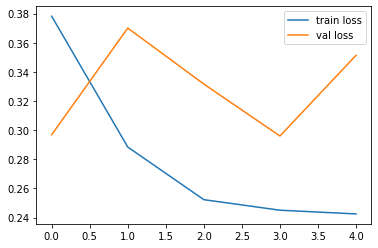

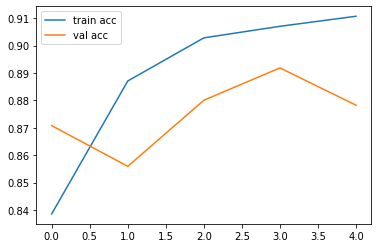

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# saving it to hd5 format


from tensorflow.keras.models import load_model

model.save('malaria_model.hd5')

INFO:tensorflow:Assets written to: malaria_model.hd5/assets


In [3]:
y_pred = model.predict(test_set)

NameError: ignored

In [48]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [22]:
!pip install streamlit

     |████████████████████████████████| 9.1 MB 9.7 MB/s 
     |████████████████████████████████| 180 kB 33.8 MB/s 
     |████████████████████████████████| 111 kB 31.0 MB/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
     |████████████████████████████████| 4.3 MB 32.6 MB/s 
     |████████████████████████████████| 178 kB 39.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 126 kB 45.3 MB/s 
     |████████████████████████████████| 791 kB 46.1 MB/s 
     |████████████████████████████████| 374 kB 43.0 MB/s 
  Created wheel for pympler: filename=Pympler-0.9-py3-none-any.whl size=164824 sha256=500d169769fb24a339eb146e41b97d607e2a91affeac9b63f82279ba11e4c662
  Stored in directory: /root/.cache/pip/wheels/1a/f3/d8/35d5614ea4ddd295ffb9372a5f2f9570d9593d1ea4be33ec6d
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=993eacce0d5f4891f54b72f244c081ffddb01c09699c8742023a611421dd8b95
  Stored in direc

In [2]:
%%writefile app.py
import streamlit as st
import tensorflow as tf


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/malaria_model.hd5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Malaria Disease infected
         """
         )

file = st.file_uploader("Please upload the Malaria Image", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    size = (224, 224)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    img = np.asarray(image)
    img_reshape = img[np.newaxis,...]
    prediction = model.predict(img_reshape)
    
    return prediction

if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    if predictions == [[1.]]:
        string = "The patient doesn't have malaria infected cells"
    else:
        string = "The patient has malaria infected cells"
    st.success(string)

Overwriting app.py


In [40]:
!pip install pyngrok

In [41]:
!ngrok authtoken 22MPIynodEIHCyfNnX66YuUe0fD_4Egs5p9ULHLyR8GUWbS4t

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [42]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

In [ ]:
!cat /content/nohup.out